In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '../')
import geoplot.crs as ccrs
import geoplot as gplt
import shapely
%matplotlib inline

In [8]:
# census_tracts = gpd.read_file("../data/boston_airbnb/Census2010_Tracts.shp")
# census_tracts = census_tracts.to_crs(epsg=4326)
listings = pd.read_csv("../data/boston_airbnb/listings.csv")

In [44]:
boston_zip_codes = gpd.read_file("../data/boston_airbnb/ZIPCODES_NT_POLY.shp")

In [9]:
airbnbs = listings[['latitude', 'longitude']].apply(lambda srs: Point(srs['longitude'], srs['latitude']), axis='columns')

In [10]:
listings = gpd.GeoDataFrame(data=listings, geometry=airbnbs)

In [11]:
listings['price'] = listings['price'].map(lambda p: p[1:].replace(".", "").replace(",", "")).astype(float)

In [6]:
listings = listings[['price', 'geometry']].dropna()

In [31]:
listings['zipcode'] = listings['zipcode'].map(lambda z: float(str(z).replace("-", "").split(" ")[0]))
listings = listings[listings['zipcode'].notnull()]

In [45]:
boston_zip_codes['POSTCODE'] = boston_zip_codes['POSTCODE'].map(lambda p: float(p[1:]) if p[0] == '0' else float(p))
boston_zip_codes = boston_zip_codes.set_index("POSTCODE")

In [54]:
listings = listings[~listings['zipcode'].isin([2218.0, 21341704.0])]

In [50]:
boston_zip_codes.loc[2218.0]

KeyError: 'the label [2218.0] is not in the [index]'

AttributeError: 'list' object has no attribute 'envelope'

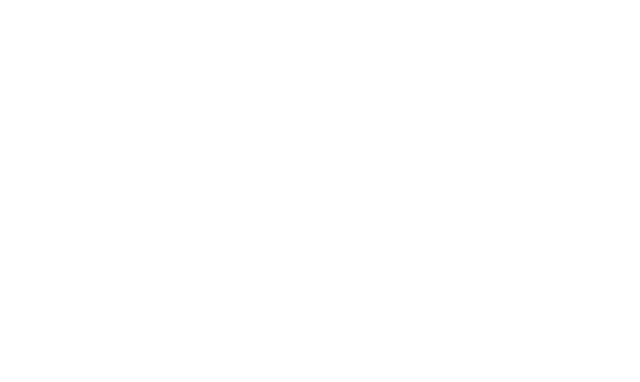

In [55]:
gplt.aggplot(listings, projection=ccrs.AlbersEqualArea(), hue='price', 
             by='zipcode', geometry=boston_zip_codes.geometry)

In [12]:
# gplt.pointplot(listings, hue='price', cmap='Blues')
# import mplleaflet; mplleaflet.display()

In [39]:
# ax = gplt.kdeplot(listings, projection=ccrs.AlbersEqualArea(), shade=True, shade_lowest=False,
#                   clip=census_tracts.geometry)
# gplt.polyplot(census_tracts, projection=ccrs.AlbersEqualArea(), ax=ax, linewidth=0.5)

This is a case for `aggplot`! ...right, except I first need to fix `aggplot` up.